In [171]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime, date
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# Read the Data

In [172]:
df = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',', parse_dates=[['Date', 'Time']])
df.shape

(9471, 16)

In [246]:
df.to_csv('AirQualityUCI_sep.csv', index=False)

In [173]:
df.head()

,Date_Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004 18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004 19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004 20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004 21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004 22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


# Preprocess the Data

In [174]:
df_act = df.copy(deep=True)

In [175]:
df_act.head()

,Date_Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004 18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004 19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004 20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004 21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004 22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [176]:
df_act.isnull().sum()

Date_Time           0
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [177]:
df_act.fillna(df_act.mean(), inplace=True)

In [178]:
df_act.isnull().sum()

Date_Time           0
CO(GT)              0
PT08.S1(CO)         0
NMHC(GT)            0
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)             0
PT08.S3(NOx)        0
NO2(GT)             0
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [179]:
df_act = df_act.dropna(axis=1)
df_act.isnull().sum()

Date_Time        0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [180]:
cols = df_act.columns
cols[1:]

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [181]:
df_act = df_act[cols[1:]].apply(pd.to_numeric)

In [182]:
df_act.lt(0).sum()

CO(GT)           1797
PT08.S1(CO)       366
NMHC(GT)         8557
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 379
RH                366
AH                480
dtype: int64

In [183]:
df_act = df_act.drop(labels='NMHC(GT)', axis = 1)
cols = df_act.columns
cols

Index(['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH'],
      dtype='object')

In [184]:
cols[0]

'CO(GT)'

In [185]:
df_temp0 = df_act[df_act[cols[0]] > 0]
df_temp1 = df_act[df_act[cols[1]] > 0]
df_temp2 = df_act[df_act[cols[2]] > 0]
df_temp3 = df_act[df_act[cols[3]] > 0]
df_temp4 = df_act[df_act[cols[4]] > 0]
df_temp5 = df_act[df_act[cols[5]] > 0]
df_temp6 = df_act[df_act[cols[6]] > 0]
df_temp7 = df_act[df_act[cols[7]] > 0]
df_temp8 = df_act[df_act[cols[8]] > 0]
df_temp9 = df_act[df_act[cols[9]] > 0]
df_temp10 = df_act[df_act[cols[10]] > 0]
df_temp11 = df_act[df_act[cols[11]] > 0]
df_temp11.shape

(8991, 12)

In [186]:
df_act.loc[df_act[cols[0]] < 0] = df_temp0.mean()[cols[0]]
df_act.loc[df_act[cols[1]] < 0] = df_temp1.mean()[cols[1]]
df_act.loc[df_act[cols[2]] < 0] = df_temp2.mean()[cols[2]]
df_act.loc[df_act[cols[3]] < 0] = df_temp3.mean()[cols[3]]
df_act.loc[df_act[cols[4]] < 0] = df_temp4.mean()[cols[4]]
df_act.loc[df_act[cols[5]] < 0] = df_temp5.mean()[cols[5]]
df_act.loc[df_act[cols[6]] < 0] = df_temp6.mean()[cols[6]]
df_act.loc[df_act[cols[7]] < 0] = df_temp7.mean()[cols[7]]
df_act.loc[df_act[cols[8]] < 0] = df_temp8.mean()[cols[8]]
df_act.loc[df_act[cols[9]] <= 0] = df_temp9.mean()[cols[9]]
df_act.loc[df_act[cols[10]] < 0] = df_temp10.mean()[cols[10]]
df_act.loc[df_act[cols[11]] < 0] = df_temp11.mean()[cols[11]]

In [187]:
df_act.lt(0).sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [188]:
# del df_act['NOx(GT)']
# del df_act['NO2(GT)']
df_act.shape

(9471, 12)

# Univariate Analysis

Text(0.5, 1.0, '')

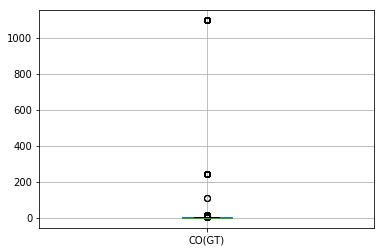

In [189]:
df_act.boxplot(column = 'CO(GT)');
plt.title('')

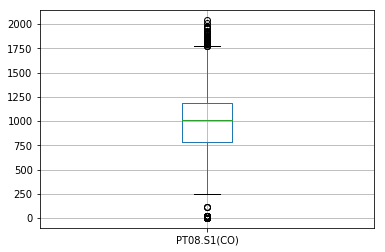

In [190]:
df_act.boxplot(column = cols[1]);

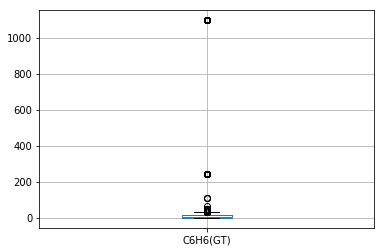

In [191]:
df_act.boxplot(column = cols[2]);

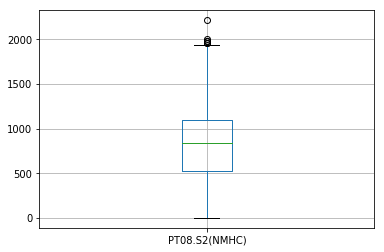

In [192]:
df_act.boxplot(column = cols[3]);

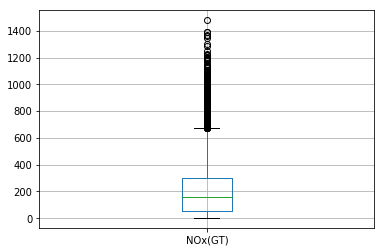

In [193]:
df_act.boxplot(column = cols[4]);

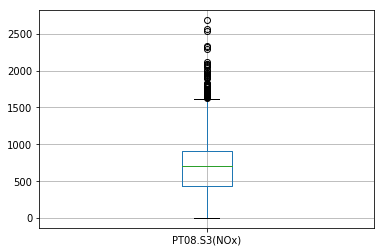

In [194]:
df_act.boxplot(column = cols[5]);

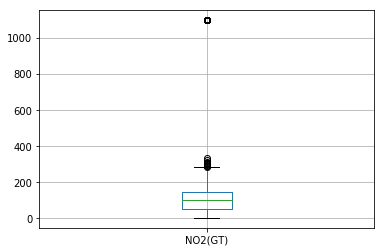

In [195]:
df_act.boxplot(column = cols[6]);

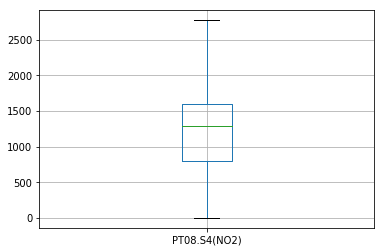

In [196]:
df_act.boxplot(column = cols[7]);

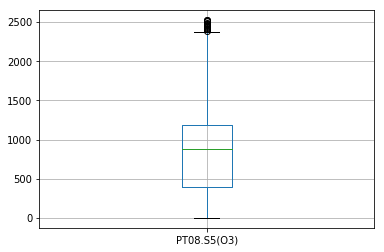

In [197]:
df_act.boxplot(column = cols[8]);

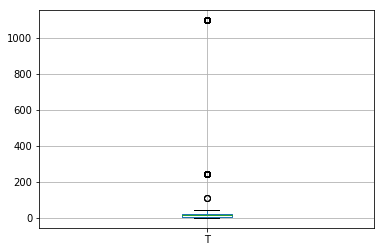

In [198]:
df_act.boxplot(column = cols[9]);

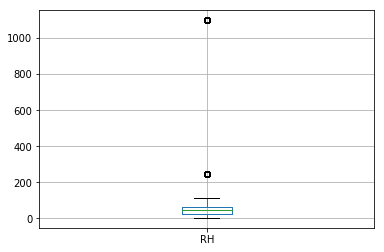

In [199]:
df_act.boxplot(column = cols[10]);

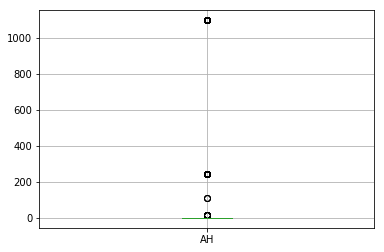

In [200]:
df_act.boxplot(column = cols[11]);

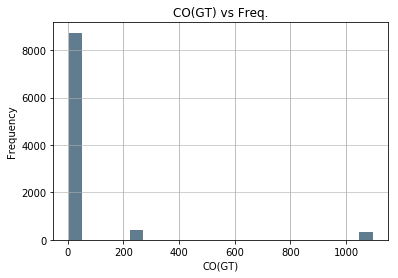

In [201]:
df_act[cols[0]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[0] + ' vs Freq.')
plt.xlabel(cols[0])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

## Applying log transformation to the above column

In [202]:
df_act[cols[0]] = np.log(df_act[cols[0]])

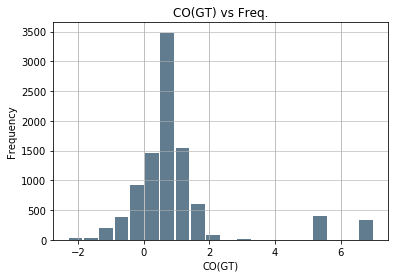

In [203]:

df_act[cols[0]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[0] + ' vs Freq.')
plt.xlabel(cols[0])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

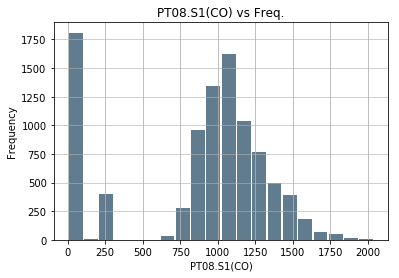

In [204]:
df_act[cols[1]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[1] + ' vs Freq.')
plt.xlabel(cols[1])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

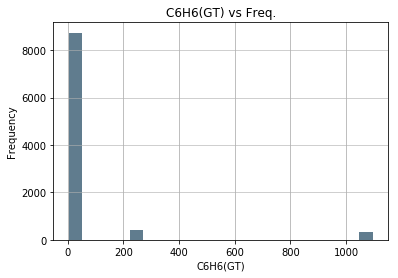

In [205]:
df_act[cols[2]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[2] + ' vs Freq.')
plt.xlabel(cols[2])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

## Applying log transformation to the above column

In [206]:
df_act[cols[2]] = np.log(df_act[cols[2]])

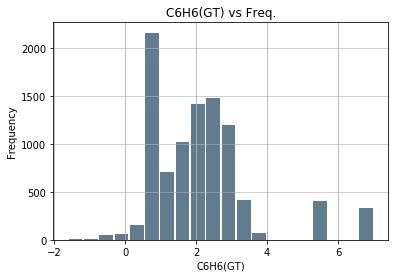

In [207]:
df_act[cols[2]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[2] + ' vs Freq.')
plt.xlabel(cols[2])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

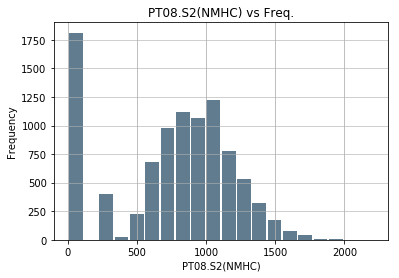

In [208]:
df_act[cols[3]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[3] + ' vs Freq.')
plt.xlabel(cols[3])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

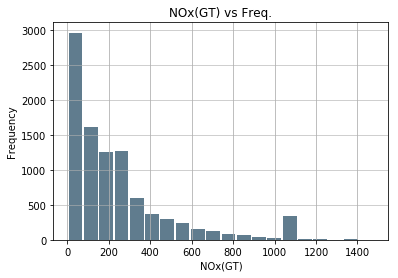

In [209]:
df_act[cols[4]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[4] + ' vs Freq.')
plt.xlabel(cols[4])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

In [210]:
df_act[cols[4]] = np.log(df_act[cols[4]])

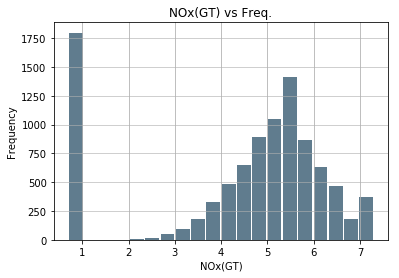

In [211]:
df_act[cols[4]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[4] + ' vs Freq.')
plt.xlabel(cols[4])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

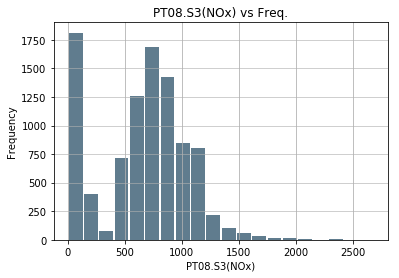

In [212]:
df_act[cols[5]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[5] + ' vs Freq.')
plt.xlabel(cols[5])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

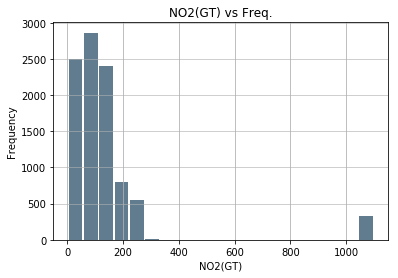

In [213]:
df_act[cols[6]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[6] + ' vs Freq.')
plt.xlabel(cols[6])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

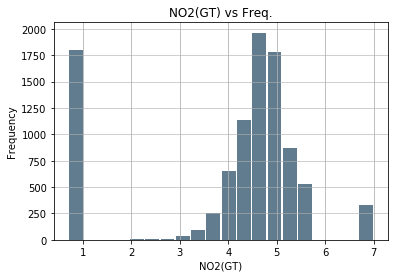

In [214]:
np.log(df_act[cols[6]]).plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[6] + ' vs Freq.')
plt.xlabel(cols[6])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

In [215]:
df_act[cols[6]] = np.log(df_act[cols[6]])

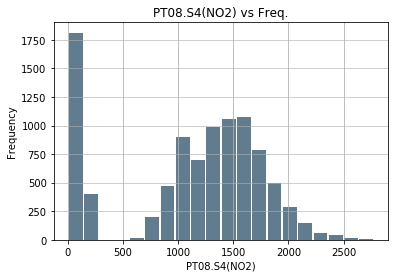

In [216]:
df_act[cols[7]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[7] + ' vs Freq.')
plt.xlabel(cols[7])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

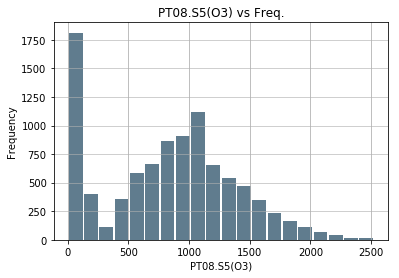

In [217]:
df_act[cols[8]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[8] + ' vs Freq.')
plt.xlabel(cols[8])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

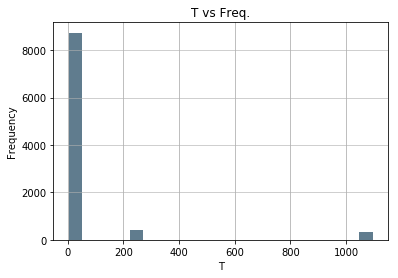

In [218]:
df_act[cols[9]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[9] + ' vs Freq.')
plt.xlabel(cols[9])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

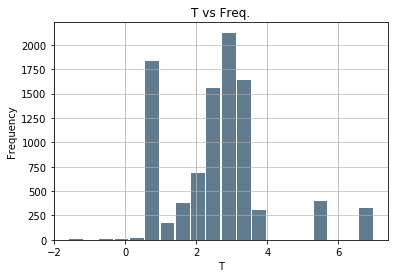

In [219]:
np.log(df_act[cols[9]]).plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[9] + ' vs Freq.')
plt.xlabel(cols[9])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

In [220]:
df_act[cols[9]] = np.log(df_act[cols[9]])

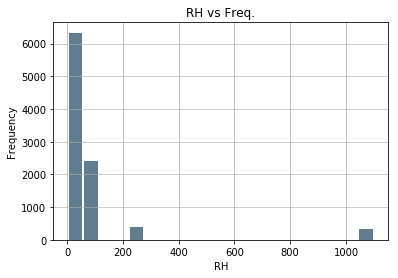

In [221]:
df_act[cols[10]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[10] + ' vs Freq.')
plt.xlabel(cols[10])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

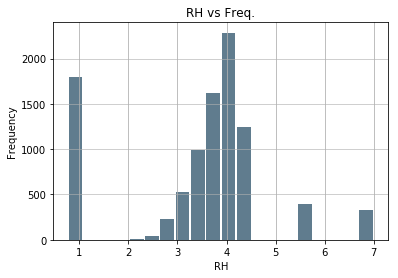

In [222]:
np.log(df_act[cols[10]]).plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[10] + ' vs Freq.')
plt.xlabel(cols[10])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

In [223]:
df_act[cols[10]] = np.log(df_act[cols[10]])

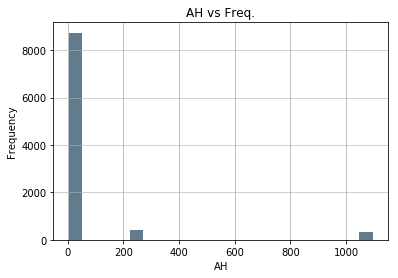

In [224]:
df_act[cols[11]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[11] + ' vs Freq.')
plt.xlabel(cols[11])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

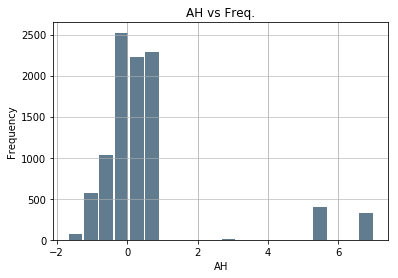

In [225]:
np.log(df_act[cols[11]]).plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(cols[11] + ' vs Freq.')
plt.xlabel(cols[11])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

In [226]:
df_act[cols[11]] = np.log(df_act[cols[11]])

# Bivariate analysis

In [227]:
corr = df_act.corr()
corr.style.background_gradient(cmap='coolwarm')

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1,-0.0274662,0.887391,0.083006,0.315914,-0.167263,0.371509,-0.114702,0.0859369,0.679276,0.469728,0.899989
PT08.S1(CO),-0.0274662,1,0.377495,0.967294,0.868265,0.615524,0.818473,0.93657,0.933789,0.420662,0.675106,-0.26428
C6H6(GT),0.887391,0.377495,1,0.485074,0.657213,0.100777,0.69821,0.30967,0.454053,0.850934,0.718735,0.730289
PT08.S2(NMHC),0.083006,0.967294,0.485074,1,0.866541,0.520237,0.809814,0.935262,0.948415,0.473455,0.642904,-0.181183
NOx(GT),0.315914,0.868265,0.657213,0.866541,1,0.573887,0.96982,0.745562,0.836358,0.648755,0.872924,0.0683182
PT08.S3(NOx),-0.167263,0.615524,0.100777,0.520237,0.573887,1,0.650396,0.602563,0.384679,0.438475,0.64965,-0.15998
NO2(GT),0.371509,0.818473,0.69821,0.809814,0.96982,0.650396,1,0.71595,0.748998,0.752888,0.919868,0.171673
PT08.S4(NO2),-0.114702,0.93657,0.30967,0.935262,0.745562,0.602563,0.71595,1,0.851348,0.43224,0.585841,-0.277717
PT08.S5(O3),0.0859369,0.933789,0.454053,0.948415,0.836358,0.384679,0.748998,0.851348,1,0.357678,0.591161,-0.204298
T,0.679276,0.420662,0.850934,0.473455,0.648755,0.438475,0.752888,0.43224,0.357678,1,0.805688,0.666802


# Feature Scaling

In [228]:
#normalize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_final = pd.DataFrame(scaler.fit_transform(df_act))
df_final.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.047480,0.996190,0.221753,0.652196,0.353498,1.022904,0.418512,0.869666,0.802365,-0.005854,0.318106,-0.479861
1,-0.208560,0.858273,0.060275,0.451107,0.108475,1.317484,0.296794,0.669960,0.267960,-0.021763,0.301371,-0.505131
2,-0.150044,1.081374,0.030499,0.415751,0.231931,1.232605,0.423728,0.663953,0.452113,-0.101096,0.384922,-0.485709
3,-0.150044,1.028641,0.045549,0.435639,0.371727,1.112776,0.463880,0.707498,0.685013,-0.157188,0.455884,-0.458148
4,-0.345560,0.817710,-0.192326,0.188144,0.231931,1.394874,0.434024,0.566352,0.517109,-0.144336,0.451379,-0.456602


# Drop Duplicates

In [229]:
print(df_final.shape)
df_final = df_final.drop_duplicates()
print(df_final.shape)

(9471, 12)
(6934, 12)


## Import all the PYOD Algos

In [230]:
# Import models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF

In [231]:
random_state = np.random.RandomState(42)
outliers_fraction = 0.05
# Define seven outlier detection tools to be compared
classifiers = {
#         'Angle-based Outlier Detector (ABOD)': ABOD(contamination=outliers_fraction),
#         'Cluster-based Local Outlier Factor (CBLOF)':CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=random_state),
#         'Feature Bagging':FeatureBagging(LOF(n_neighbors=35),contamination=outliers_fraction,check_estimator=False,random_state=random_state),
#         'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
        'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
#         'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
#         'Average KNN': KNN(method='mean',contamination=outliers_fraction)
}

In [232]:
X = df_final.copy(deep=True)

In [233]:
from sklearn.decomposition import PCA

In [234]:
# aa , bb, cc, dd, ee, ff, gg, hh, ii, jj, kk, ll = np.meshgrid(np.linspace(0,1 , 200), np.linspace(0, 1, 200), np.linspace(0, 1, 200), np.linspace(0, 1, 200), np.linspace(0, 1, 200), np.linspace(0, 1, 200), np.linspace(0, 1, 200), np.linspace(0, 1, 200), np.linspace(0, 1, 200), np.linspace(0, 1, 200), np.linspace(0, 1, 200), np.linspace(0, 1, 200))
# aa
xx, yy = np.meshgrid(np.linspace(0,1 , 200), np.linspace(0, 1, 200))

In [235]:
X.shape

(6934, 12)

In [236]:
#PCA with two principal components
pca_2d = PCA(n_components=2)
    
PCs_2d = pd.DataFrame(pca_2d.fit_transform(df_final))
    
PCs_2d.columns = ["PC1_2d", "PC2_2d"]
print(type(pca_2d))
print(PCs_2d.head())
print(PCs_2d.shape)
# pandas.DataFrame(pca.transform(df), columns=['PCA%i' % i for i in range(n_components)], index=df.index)

<class 'sklearn.decomposition.pca.PCA'>
     PC1_2d    PC2_2d
0 -0.422143 -0.114524
1  0.309111 -0.210896
2  0.086880 -0.025581
3 -0.121417  0.096972
4  0.447365  0.083416
(6934, 2)


In [237]:


for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(PCs_2d)
    # predict raw anomaly score
    scores_pred = clf.decision_function(PCs_2d) * -1
        
    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(PCs_2d)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    plt.figure(figsize=(10, 10))
    
    # copy of dataframe
    dfx = PCs_2d.copy(deep=True)
    dfx['outlier'] = y_pred.tolist()
    
    dfx = pd.concat([dfx,PCs_2d], axis=1, join='inner')
    
    #Note that all of the DataFrames below are sub-DataFrames of 'plotX'.
    #This is because we intend to plot the values contained within each of these DataFrames.

#     inliers = X[X["outlier"] == 0]
#     outliers = X[X["outlier"] == 1]
    # IX1 - inlier feature 1,  IX2 - inlier feature 2
    IX1 =  np.array(dfx['PC1_2d'][dfx['outlier'] == 0]).reshape(-1,1)
    IX2 =  np.array(dfx['PC2_2d'][dfx['outlier'] == 0]).reshape(-1,1)
    
    # OX1 - outlier feature 1, OX2 - outlier feature 2
    OX1 =  dfx['PC1_2d'][dfx['outlier'] == 1].values.reshape(-1,1)
    OX2 =  dfx['PC2_2d'][dfx['outlier'] == 1].values.reshape(-1,1)
         
    print('OUTLIERS : ',n_outliers,'INLIERS : ',n_inliers, clf_name)
        
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
        
    # decision function calculates the raw anomaly score for every point
#     Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
#     Z = Z.reshape(xx.shape)
          
#     # fill blue map colormap from minimum anomaly score to threshold value
#     plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
#     # draw red contour line where anomaly score is equal to thresold
#     a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
#     # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
# #     plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
        
#     b = plt.scatter(IX1,IX2, c='white',s=20, edgecolor='k')
    
#     c = plt.scatter(OX1,OX2, c='black',s=20, edgecolor='k')
       
#     plt.axis('tight')  
    
#     # loc=2 is used for the top left corner 
#     plt.legend(
#         [ a.collections[0],b,c],
#         ['learned decision function', 'inliers','outliers'],
#         prop=matplotlib.font_manager.FontProperties(size=20),
#         loc=2)
      
#     plt.xlim((0, 1))
#     plt.ylim((0, 1))
#     plt.title(clf_name)
#     plt.show()

OUTLIERS :  347 INLIERS :  6587 Isolation Forest


<Figure size 720x720 with 0 Axes>

In [238]:
dfx.head(25)

,PC1_2d,PC2_2d,outlier,PC1_2d,PC2_2d
0,-0.422143,-0.114524,0,-0.422143,-0.114524
1,0.309111,-0.210896,0,0.309111,-0.210896
2,0.086880,-0.025581,0,0.086880,-0.025581
3,-0.121417,0.096972,0,-0.121417,0.096972
4,0.447365,0.083416,0,0.447365,0.083416
5,1.071075,0.010965,0,1.071075,0.010965
6,1.597377,-0.109085,0,1.597377,-0.109085
7,1.691910,-0.078846,0,1.691910,-0.078846
8,2.182931,-0.151793,0,2.182931,-0.151793
9,-0.313864,-1.164331,0,-0.313864,-1.164331


In [239]:
dfx.shape

(6934, 5)

In [240]:
df_act.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.955511,1360.0,2.476538,1046.0,5.111988,1056.0,4.727388,1692.0,1268.0,2.610070,3.889777,-0.277336
1,0.693147,1292.0,2.240710,955.0,4.634729,1174.0,4.521789,1559.0,972.0,2.587764,3.864931,-0.320894
2,0.788457,1402.0,2.197225,939.0,4.875197,1140.0,4.736198,1555.0,1074.0,2.476538,3.988984,-0.287415
3,0.788457,1376.0,2.219203,948.0,5.147494,1092.0,4.804021,1584.0,1203.0,2.397895,4.094345,-0.239908
4,0.470004,1272.0,1.871802,836.0,4.875197,1205.0,4.753590,1490.0,1110.0,2.415914,4.087656,-0.237242


In [241]:
df_final['outlier'] = dfx.outlier

In [242]:
df_final[df_final.outlier == 1].tail(5)

,0,1,2,3,4,5,6,7,8,9,10,11,outlier
6597,-0.308339,0.132182,-0.016742,0.360506,0.696836,0.566056,0.407940,-0.145386,0.018812,0.198025,-0.257629,-0.812103,1.0
6654,-0.071560,0.535792,0.052952,0.442268,0.674159,0.446227,0.413249,0.064832,0.777089,-0.393299,0.458125,-0.574982,1.0
6655,-0.208560,0.308635,-0.258642,0.126271,0.507342,0.785743,0.357881,-0.097336,0.495444,-0.393299,0.446843,-0.584164,1.0
6678,-0.240052,0.410044,-0.103532,0.269906,0.720071,0.231533,0.386212,0.055823,0.666959,-0.332744,0.564500,-0.454619,1.0
6679,-0.208560,0.543904,0.095761,0.495302,0.748068,0.101718,0.363656,0.181954,0.721121,-0.420912,0.599858,-0.464376,1.0


In [243]:
df_final[df_final.outlier == 0].head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,outlier
0,-0.047480,0.996190,0.221753,0.652196,0.353498,1.022904,0.418512,0.869666,0.802365,-0.005854,0.318106,-0.479861,0.0
1,-0.208560,0.858273,0.060275,0.451107,0.108475,1.317484,0.296794,0.669960,0.267960,-0.021763,0.301371,-0.505131,0.0
2,-0.150044,1.081374,0.030499,0.415751,0.231931,1.232605,0.423728,0.663953,0.452113,-0.101096,0.384922,-0.485709,0.0
3,-0.150044,1.028641,0.045549,0.435639,0.371727,1.112776,0.463880,0.707498,0.685013,-0.157188,0.455884,-0.458148,0.0
4,-0.345560,0.817710,-0.192326,0.188144,0.231931,1.394874,0.434024,0.566352,0.517109,-0.144336,0.451379,-0.456602,0.0


In [244]:
df_final.to_csv('air_quality_precprocessed_with_outlier_status.csv', index=False)

In [245]:
df_final.iloc[5:15]

,0,1,2,3,4,5,6,7,8,9,10,11,outlier
5,-0.522184,0.665596,-0.414342,-0.001896,0.033471,1.724403,0.321990,0.420701,0.226436,-0.144336,0.446843,-0.459551,0.0
6,-0.522184,0.641257,-0.596910,-0.134482,-0.152123,2.036458,0.191425,0.330608,-0.163535,-0.137996,0.418970,-0.477951,0.0
7,-0.634121,0.541876,-0.656489,-0.174258,-0.152123,2.013990,0.183686,0.330608,-0.168952,-0.176911,0.455884,-0.470445,0.0
8,-0.698808,0.456692,-0.903684,-0.313474,-0.316653,2.328541,0.043740,0.245019,-0.367548,-0.176911,0.452508,-0.474527,0.0
9,2.745298,-1.263702,2.294974,-1.116157,0.554933,-0.999817,0.878482,-1.301948,-1.043214,2.058502,1.405535,2.874281,0.0
10,-0.163374,-1.757778,-0.948988,-1.654468,-1.877338,-1.607960,-1.926250,-1.667734,-1.483023,-1.320614,-1.785292,0.125845,1.0
11,-0.853103,0.399903,-1.408738,-0.527822,-0.847544,3.174834,-0.407458,0.103873,-0.725022,-0.157188,0.411818,-0.496322,1.0
12,-0.853103,0.371509,-1.152175,-0.437221,-0.460559,2.725475,-0.088364,0.162433,-0.634751,-0.190369,0.434211,-0.497347,0.0
13,-0.575605,0.558102,-0.677559,-0.185307,0.082927,2.106358,0.228671,0.339617,-0.168952,-0.211044,0.451379,-0.492319,0.0
14,-0.208560,0.941429,-0.050150,0.329570,0.377663,1.222619,0.413249,0.606894,0.502665,-0.170276,0.426047,-0.493024,0.0
